In [47]:
import sys
print("Python version:", sys.version)

Python version: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]


In [48]:
import matplotlib
matplotlib.__version__

'3.8.3'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('brain_stroke.csv')

In [3]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [5]:
data.shape

(4981, 11)

In [6]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
data_columns = [col.lower() for col in data]
data_columns

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4976    False
4977    False
4978    False
4979    False
4980    False
Length: 4981, dtype: bool

In [9]:
data.duplicated().sum()

0

In [10]:
data.duplicated().isnull().sum()

0

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


<Axes: >

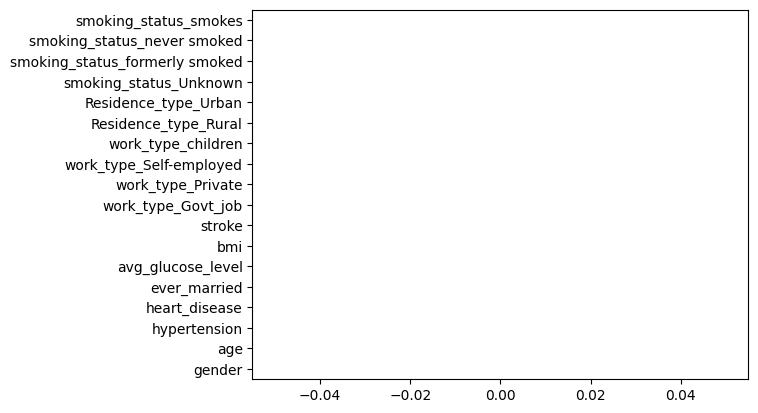

In [55]:
# Printing the number of N/A values in eacg column
print(data.isna().sum())
# Graphical representation of the na values present in the attribute - bar graph
data.isna().sum().plot.barh()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [12]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [13]:
data.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [14]:
data_cat = data[['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'stroke']]
data_cat

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Male,0,1,Yes,Private,Rural,never smoked,1
2,Female,0,0,Yes,Private,Urban,smokes,1
3,Female,1,0,Yes,Self-employed,Rural,never smoked,1
4,Male,0,0,Yes,Private,Urban,formerly smoked,1
...,...,...,...,...,...,...,...,...
4976,Male,0,0,No,Private,Rural,formerly smoked,0
4977,Male,0,0,Yes,Private,Urban,smokes,0
4978,Female,1,0,Yes,Govt_job,Rural,smokes,0
4979,Male,0,0,Yes,Private,Rural,smokes,0


In [15]:
data_cat.columns

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'stroke'],
      dtype='object')

In [16]:
for i in data_cat.columns:
    print(data_cat[i].nunique())

2
2
2
2
4
2
4
2


In [17]:
for i in data_cat.columns:
    print(data_cat[i].value_counts())

gender
Female    2907
Male      2074
Name: count, dtype: int64
hypertension
0    4502
1     479
Name: count, dtype: int64
heart_disease
0    4706
1     275
Name: count, dtype: int64
ever_married
Yes    3280
No     1701
Name: count, dtype: int64
work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: count, dtype: int64
Residence_type
Urban    2532
Rural    2449
Name: count, dtype: int64
smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: count, dtype: int64
stroke
0    4733
1     248
Name: count, dtype: int64


In [18]:
data['ever_married'] = [ 0 if i !='Yes' else 1 for i in data['ever_married'] ]
data['gender'] = [0 if i != 'Female' else 1 for i in data['gender']]

In [19]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [20]:
data = pd.get_dummies(data, columns = ['work_type', 'Residence_type', 'smoking_status'])
data

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,228.69,36.6,1,False,True,False,False,False,True,False,True,False,False
1,0,80.0,0,1,1,105.92,32.5,1,False,True,False,False,True,False,False,False,True,False
2,1,49.0,0,0,1,171.23,34.4,1,False,True,False,False,False,True,False,False,False,True
3,1,79.0,1,0,1,174.12,24.0,1,False,False,True,False,True,False,False,False,True,False
4,0,81.0,0,0,1,186.21,29.0,1,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0,41.0,0,0,0,70.15,29.8,0,False,True,False,False,True,False,False,True,False,False
4977,0,40.0,0,0,1,191.15,31.1,0,False,True,False,False,False,True,False,False,False,True
4978,1,45.0,1,0,1,95.02,31.8,0,True,False,False,False,True,False,False,False,False,True
4979,0,40.0,0,0,1,83.94,30.0,0,False,True,False,False,True,False,False,False,False,True


In [21]:
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2948,1,33.0,0,0,1,73.20,28.9,0,False,True,False,False,True,False,True,False,False,False
2084,0,58.0,0,1,1,227.81,33.0,0,False,False,True,False,False,True,False,True,False,False
603,0,40.0,0,0,1,100.26,26.0,0,True,False,False,False,True,False,True,False,False,False
2478,1,23.0,0,0,0,71.81,22.2,0,True,False,False,False,True,False,True,False,False,False
4621,0,38.0,0,0,1,73.76,37.4,0,False,True,False,False,True,False,False,False,True,False
4159,1,53.0,0,0,1,105.28,23.1,0,False,True,False,False,True,False,False,False,True,False
935,1,60.0,0,0,1,86.34,22.1,0,True,False,False,False,False,True,False,False,True,False
3913,1,5.0,0,0,0,75.10,20.7,0,False,False,False,True,True,False,True,False,False,False
1213,0,50.0,0,1,0,85.82,31.9,0,False,True,False,False,False,True,False,False,True,False
191,1,79.0,0,0,1,97.73,21.5,1,False,True,False,False,False,True,False,False,False,True


<Axes: ylabel='count'>

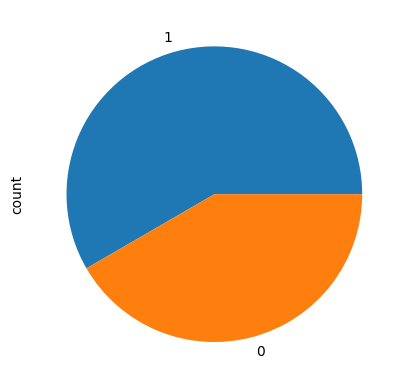

In [41]:
data['gender'].value_counts().plot(kind="pie")

<Axes: xlabel='stroke', ylabel='count'>

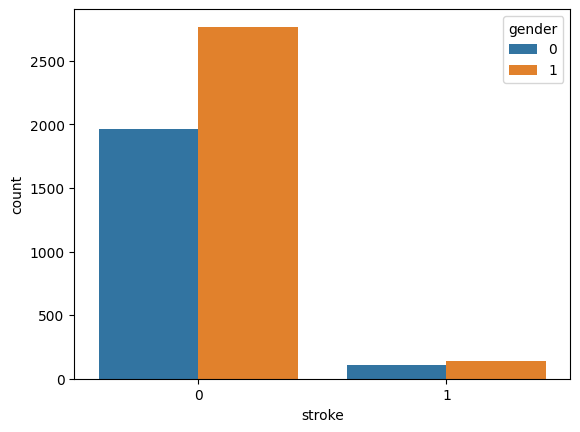

In [50]:
sns.countplot(x='stroke', hue='gender', data=data)

<Axes: ylabel='count'>

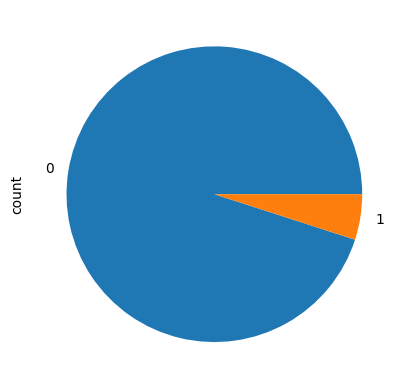

In [44]:
data['stroke'].value_counts().plot(kind="pie")

In [57]:
print("% of people who actualy got a stroke : ",(data['stroke'].value_counts()[1]/data['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  5.0


<Axes: ylabel='ever_married'>

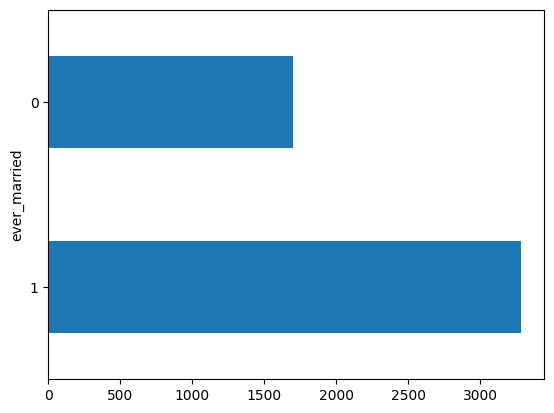

In [53]:
data['ever_married'].value_counts().plot(kind="barh")

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [23]:
X = data.drop(['stroke'], axis = 1)
y = data['stroke']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1033)
X_train.shape, X_train.shape

((3337, 17), (3337, 17))

In [25]:
classifier_log = LogisticRegression(random_state=0)
classifier_log.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [26]:
y_pred = classifier_log.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1550,    0],
       [  94,    0]], dtype=int64)

In [28]:
print('Training-set accuracy score: ', classifier_log.score(X_train, y_train))

Training-set accuracy score:  0.9541504345220257


In [29]:
print('Test-set accuracy score: ', classifier_log.score(X_test, y_test))

Test-set accuracy score:  0.9428223844282239


In [30]:
classifier_dt = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=5)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [31]:
y_pred = classifier_dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1547,    3],
       [  94,    0]], dtype=int64)

In [33]:
print('Training-set accuracy score: ', classifier_dt.score(X_train, y_train))

Training-set accuracy score:  0.9556487863350315


In [34]:
print('Test-set accuracy score: ', classifier_dt.score(X_test, y_test))

Test-set accuracy score:  0.9409975669099757


In [35]:
classifier_rf = RandomForestClassifier(n_estimators=10, criterion='entropy')
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [36]:
y_pred = classifier_rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1545,    5],
       [  94,    0]], dtype=int64)

In [38]:
print('Training-set accuracy score: ', classifier_rf.score(X_train, y_train))

Training-set accuracy score:  0.9889121965837578


In [39]:
print('Test-set accuracy score: ', classifier_rf.score(X_test, y_test))

Test-set accuracy score:  0.9397810218978102
